In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [25]:
df = pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [39]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [40]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

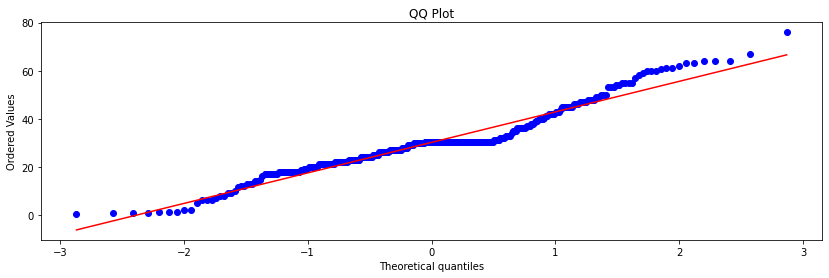

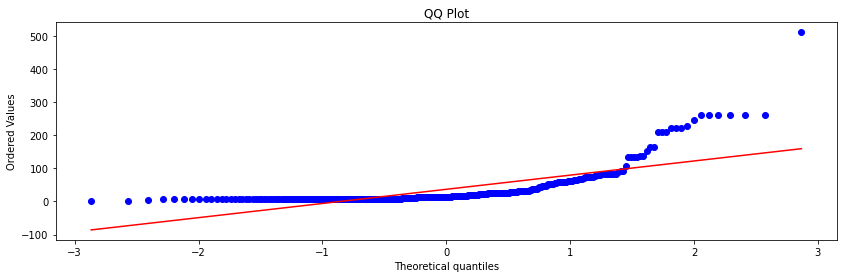

In [57]:
plt.figure(figsize=(14,4))
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('QQ Plot')
plt.show()
plt.figure(figsize=(14,4))
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('QQ Plot')
plt.show()

# Training models before funtion transformer

In [46]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DT 0.5357142857142857


# Function Transformer

In [47]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [59]:
X_train

,Age,Fare
336,32.00000,13.0000
31,24.00000,31.5000
84,30.27259,10.7083
287,24.00000,82.2667
317,19.00000,10.5000
...,...,...
71,21.00000,7.8958
106,21.00000,7.8208
270,46.00000,75.2417
348,24.00000,13.5000


In [58]:
X_train_transformed

,Age,Fare
336,3.496508,2.639057
31,3.218876,3.481240
84,3.442742,2.460298
287,3.218876,4.422049
317,2.995732,2.442347
...,...,...
71,3.091042,2.185579
106,3.091042,2.177113
270,3.850148,4.333909
348,3.218876,2.674149


In [60]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.5595238095238095


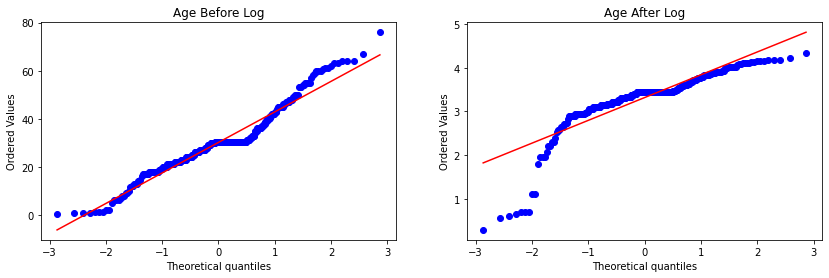

In [50]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

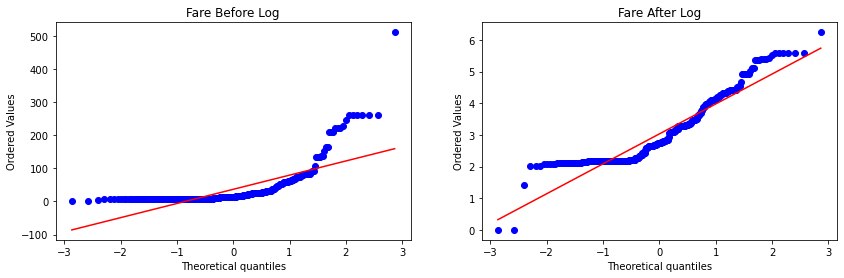

In [49]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

# Other Transformer

Accuracy 0.6483739837398372


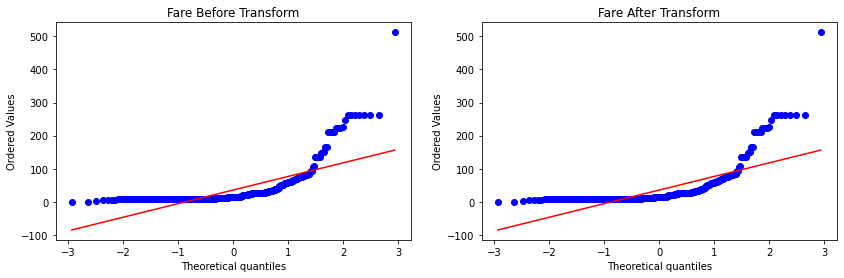

In [65]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    
apply_transform(lambda x: x+0.000001)